# Synthetic Edge Cases
Here, we compare the performance of our approach VoCC with DBSCAN.

In [1]:
# IMPORT
%run ../scripts/experiment_utils.py

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KDTree
from VoCC import VortexCorrelationClustering

In [2]:
# We generate a data set including the most concise edge cases. 
coords = create_synthetic_outlier_set(161)
X,Y,U,V = coords.T

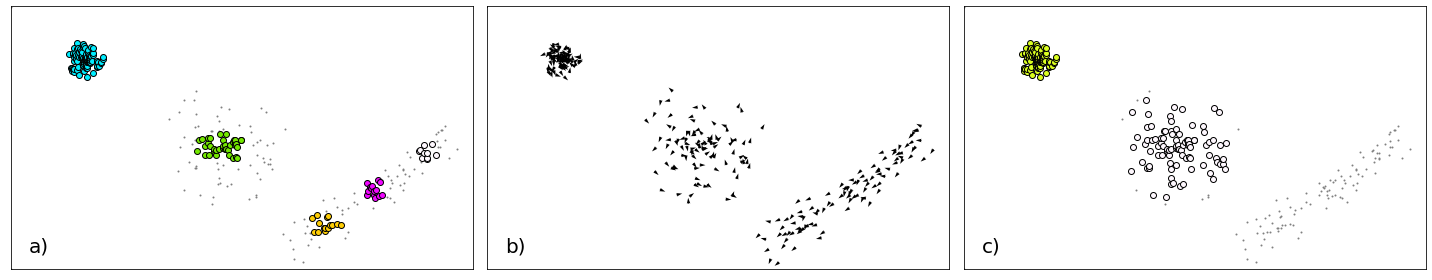

In [3]:
# Plots are generated to show how both algorithms cluster the data.
fig = plt.figure(figsize = (20,4))
axes = fig.subplot_mosaic('ABC')
ax = axes['B']
ax.quiver(X, Y, U, V, scale = 80)
ax.text(20,20, 'b)', fontsize = 20)

#DBSCAN
ax = axes['A']
labels = DBSCAN(eps = 12, min_samples=10).fit(coords[:, :2]).labels_
unique_labels = np.unique(labels)
colors = plt.cm.gist_ncar(np.linspace(0, 1, len(unique_labels)))
for label, col in zip(unique_labels, colors):
    if label < 0:
        ax.plot(coords[labels == label, 0], coords[labels == label, 1], '.', color = 'grey', markersize = 2)
    else:
        ax.plot(coords[labels == label, 0], coords[labels == label, 1], 'o', markerfacecolor = col, markeredgecolor = 'k', markersize = 6, zorder = 2)
ax.text(20,20, 'a)', fontsize = 20)

# VoCC
ax = axes['C']
vocc = VortexCorrelationClustering(np.array([40]), 1, 11, .7,.99, .05)
labels = vocc.fit(coords).labels_
colors = plt.cm.gist_ncar(np.linspace(0, 1, len(np.unique(labels))))
ax.plot(coords[:, 0], coords[:, 1], '.', color = 'grey', markersize = 2)
for label, col in zip(np.unique(labels), colors[:]):
    if label < 0:
        continue
    indices = np.argwhere(labels == label).squeeze()
    ax.plot(coords[indices, 0], coords[indices, 1],'o', markerfacecolor = col, markeredgecolor = 'k', markersize = 6, zorder = 2, linewidth = 0)
ax.text(20,20, 'c)', fontsize = 20)



for ax in axes.values():
    ax.set_xlim(0,500)
    ax.set_ylim(0,300)

    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.savefig('../fig/synthetic_data.png', dpi = 300)